In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
# --------------------------------------------------
# Parameters
# --------------------------------------------------
num_phase_qubits = 3   # number of precision qubits
phi = 1 / 8            # phase to estimate
shots = 1024

# --------------------------------------------------
# Registers
# --------------------------------------------------
phase_register = QuantumRegister(num_phase_qubits, name="q")
eigenstate_register = QuantumRegister(1, name="u")
classical_register = ClassicalRegister(num_phase_qubits, name="c")

qc = QuantumCircuit(phase_register, eigenstate_register, classical_register)

# --------------------------------------------------
# Prepare eigenstate |1>
# --------------------------------------------------
qc.x(eigenstate_register[0])

# --------------------------------------------------
# Apply Hadamard gates to phase register
# --------------------------------------------------
qc.h(phase_register)

# --------------------------------------------------
# Controlled-U operations
# U = Rz(2πφ)
# --------------------------------------------------
for i in range(num_phase_qubits):
    angle = 2 * np.pi * phi * (2 ** i)
    qc.cp(angle, phase_register[i], eigenstate_register[0])

# --------------------------------------------------
# Inverse Quantum Fourier Transform
# --------------------------------------------------
def inverse_qft(circuit, qubits):
    n = len(qubits)

    # Swap qubits
    for i in range(n // 2):
        circuit.swap(qubits[i], qubits[n - i - 1])

    # Controlled phase rotations
    for i in range(n):
        for j in range(i):
            circuit.cp(-np.pi / (2 ** (i - j)), qubits[i], qubits[j])
        circuit.h(qubits[i])

inverse_qft(qc, phase_register)

# --------------------------------------------------
# Measurement
# --------------------------------------------------
qc.measure(phase_register, classical_register)

# --------------------------------------------------
# Simulation
# --------------------------------------------------
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=shots).result()
counts = result.get_counts()

# --------------------------------------------------
# Output
# --------------------------------------------------
print("QPE measurement results:")
print(counts)


QPE measurement results:
{'001': 1024}


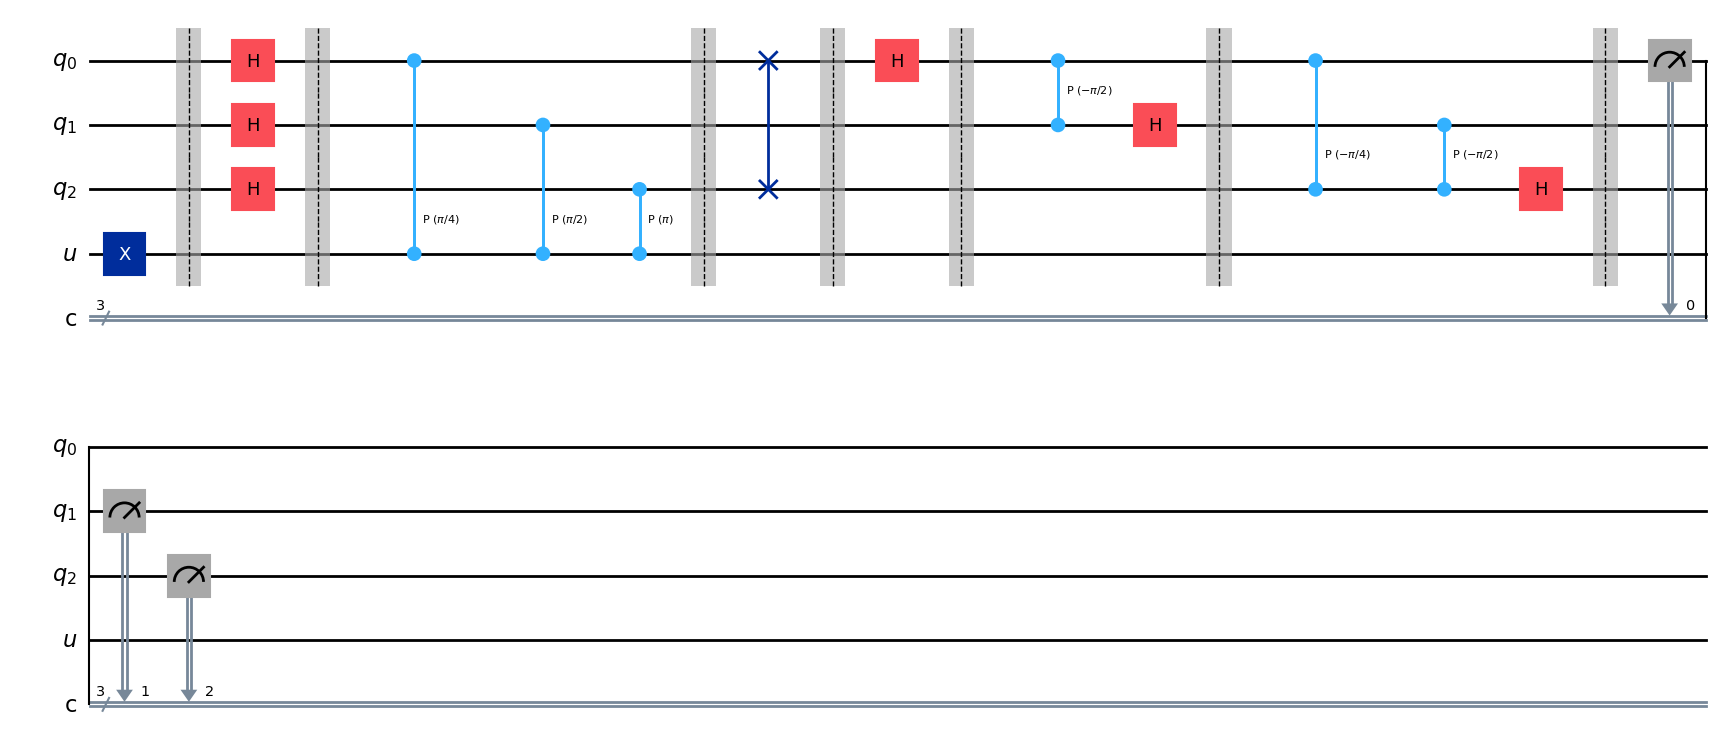

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
# --------------------------------------------------
# Parameters
# --------------------------------------------------
num_phase_qubits = 3
phi = 1 / 8
shots = 1024

# --------------------------------------------------
# Registers
# --------------------------------------------------
phase_register = QuantumRegister(num_phase_qubits, name="q")
eigenstate_register = QuantumRegister(1, name="u")
classical_register = ClassicalRegister(num_phase_qubits, name="c")

qc = QuantumCircuit(phase_register, eigenstate_register, classical_register)

# --------------------------------------------------
# 1) Prepare eigenstate |1>
# --------------------------------------------------
qc.x(eigenstate_register[0])
qc.barrier()

# --------------------------------------------------
# 2) Hadamard gates on phase register
# --------------------------------------------------
qc.h(phase_register)
qc.barrier()

# --------------------------------------------------
# 3) Controlled-U^{2^k} operations
# --------------------------------------------------
for i in range(num_phase_qubits):
    angle = 2 * np.pi * phi * (2 ** i)
    qc.cp(angle, phase_register[i], eigenstate_register[0])

qc.barrier()

# --------------------------------------------------
# 4) Inverse Quantum Fourier Transform
# --------------------------------------------------
def inverse_qft(circuit, qubits):
    n = len(qubits)

    # Swap qubits
    for i in range(n // 2):
        circuit.swap(qubits[i], qubits[n - i - 1])
    circuit.barrier()

    # Controlled phase rotations
    for i in range(n):
        for j in range(i):
            circuit.cp(-np.pi / (2 ** (i - j)), qubits[i], qubits[j])
        circuit.h(qubits[i])
        circuit.barrier()

inverse_qft(qc, phase_register)

# --------------------------------------------------
# 5) Measurement
# --------------------------------------------------
qc.measure(phase_register, classical_register)

# --------------------------------------------------
# DRAW CIRCUIT (with clear logical blocks)
# --------------------------------------------------
qc.draw(output="mpl")


# # --------------------------------------------------
# # Simulation
# # --------------------------------------------------
# simulator = AerSimulator()
# compiled_circuit = transpile(qc, simulator)
# result = simulator.run(compiled_circuit, shots=shots).result()
# counts = result.get_counts()

# print("Measurement results:", counts)




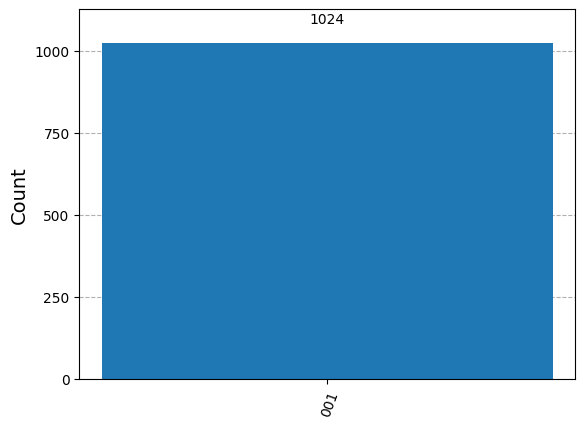

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
# --------------------------------------------------
# Parameters
# --------------------------------------------------
num_phase_qubits = 3
phi = 1 / 8
shots = 1024

# --------------------------------------------------
# Registers
# --------------------------------------------------
phase_register = QuantumRegister(num_phase_qubits, name="q")
eigenstate_register = QuantumRegister(1, name="u")
classical_register = ClassicalRegister(num_phase_qubits, name="c")

qc = QuantumCircuit(phase_register, eigenstate_register, classical_register)

# --------------------------------------------------
# 1) Prepare eigenstate |1>
# --------------------------------------------------
qc.x(eigenstate_register[0])
qc.barrier()

# --------------------------------------------------
# 2) Hadamard gates on phase register
# --------------------------------------------------
qc.h(phase_register)
qc.barrier()

# --------------------------------------------------
# 3) Controlled-U^{2^k} operations
# --------------------------------------------------
for i in range(num_phase_qubits):
    angle = 2 * np.pi * phi * (2 ** i)
    qc.cp(angle, phase_register[i], eigenstate_register[0])

qc.barrier()

# --------------------------------------------------
# 4) Inverse Quantum Fourier Transform
# --------------------------------------------------
def inverse_qft(circuit, qubits):
    n = len(qubits)

    # Swap qubits
    for i in range(n // 2):
        circuit.swap(qubits[i], qubits[n - i - 1])
    circuit.barrier()

    # Controlled phase rotations
    for i in range(n):
        for j in range(i):
            circuit.cp(-np.pi / (2 ** (i - j)), qubits[i], qubits[j])
        circuit.h(qubits[i])
        circuit.barrier()

inverse_qft(qc, phase_register)

# --------------------------------------------------
# 5) Measurement
# --------------------------------------------------
qc.measure(phase_register, classical_register)

# --------------------------------------------------
# DRAW CIRCUIT (with clear logical blocks)
# --------------------------------------------------
# qc.draw(output="mpl")


# --------------------------------------------------
# Simulation
# --------------------------------------------------
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=shots).result()
counts = result.get_counts()

plot_histogram(counts)
